<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basics" data-toc-modified-id="Basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basics</a></span><ul class="toc-item"><li><span><a href="#Configuration" data-toc-modified-id="Configuration-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Configuration</a></span></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Correllogram" data-toc-modified-id="Correllogram-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correllogram</a></span></li><li><span><a href="#Pairwise-plot" data-toc-modified-id="Pairwise-plot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pairwise plot</a></span></li><li><span><a href="#Density-plot" data-toc-modified-id="Density-plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Density plot</a></span></li></ul></li><li><span><a href="#3D-plots" data-toc-modified-id="3D-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3D plots</a></span><ul class="toc-item"><li><span><a href="#3D-line-plot" data-toc-modified-id="3D-line-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3D line plot</a></span></li><li><span><a href="#3D-scatter" data-toc-modified-id="3D-scatter-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3D scatter</a></span></li></ul></li></ul></div>

# Basics
## Configuration

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
sns.set()
# turn on grid or not
# sns.set_style("whitegrid", {'axes.grid' : False})
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.subplots_adjust(wspace =0.5, hspace =0.5)

<Figure size 432x288 with 0 Axes>

## Subplots

Text(0.5, 1.0, 'Lognormal')

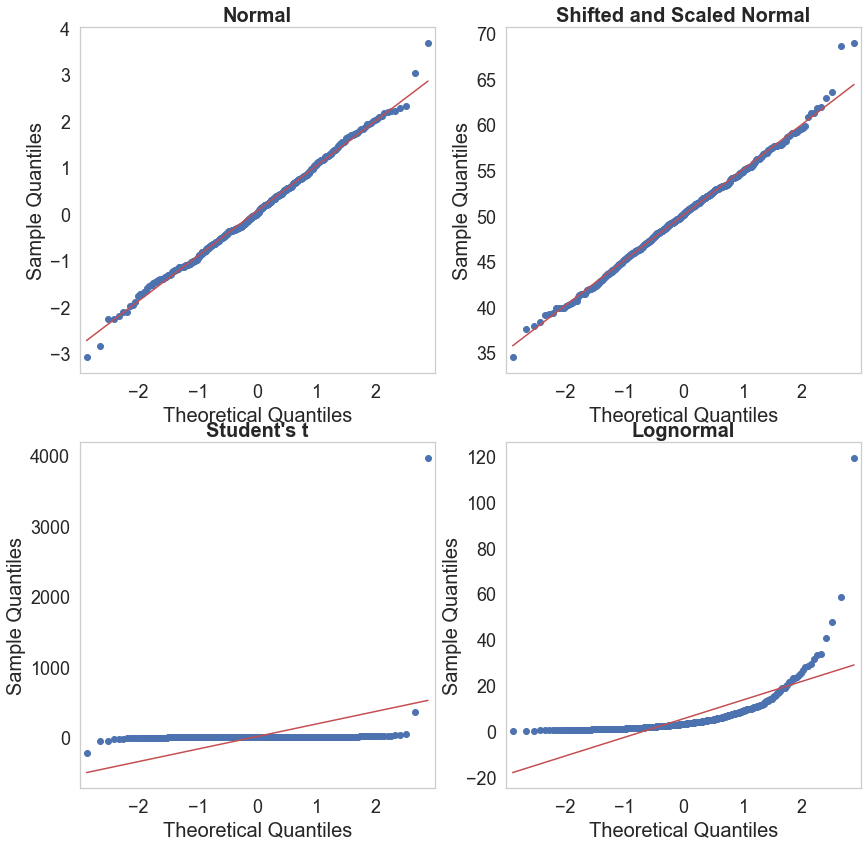

In [27]:
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
plt.figure(1, figsize=(14, 14))
nSamples = 500
# generate univariate observations
data = randn(nSamples)
# q-q plot
ax = plt.subplot(221)
qqplot(data, line='s', ax=ax)
plt.title('Normal',fontsize=20, fontweight='bold')


data = 5 * randn(nSamples) + 50
# q-q plot
ax = plt.subplot(222)
qqplot(data, line='s', ax=ax)
plt.title('Shifted and Scaled Normal',fontsize=20, fontweight='bold')


data = np.random.standard_t(1, nSamples)

ax = plt.subplot(223)
qqplot(data, line='s', ax=ax)
plt.title('Student\'s t',fontsize=20, fontweight='bold')

loc, scale = 0., 4.
data = np.random.laplace(loc, scale, nSamples)


data = np.random.lognormal(1, 1, nSamples)
ax = plt.subplot(224)
qqplot(data, line='s', ax=ax)
plt.title('Lognormal',fontsize=20, fontweight='bold')

# Data exploration

## Correllogram
Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

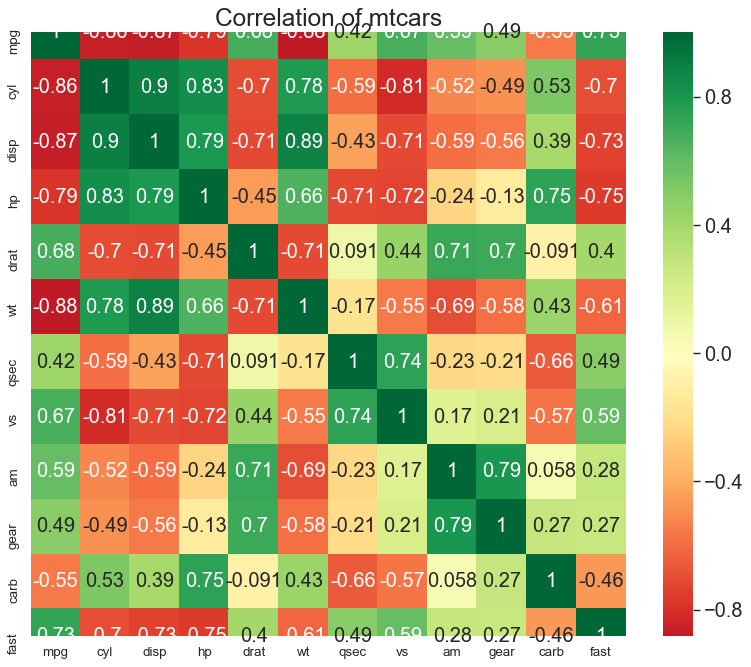

In [11]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn',center=0, annot=True)

plt.title('Correlation of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Pairwise plot
Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. It is a must have tool for bivariate analysis.

<Figure size 800x640 with 0 Axes>

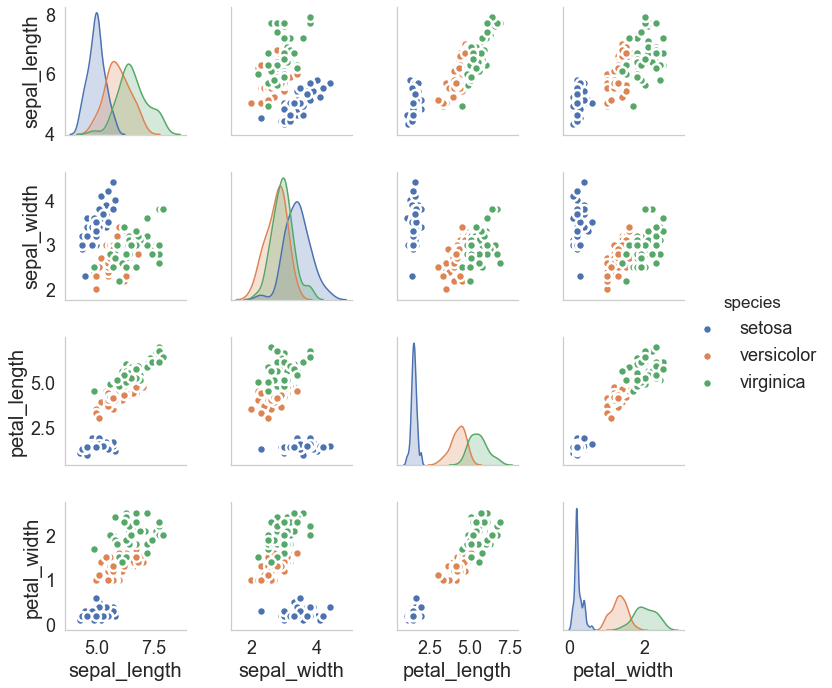

In [19]:
df = sns.load_dataset('iris')

plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df, kind='scatter', hue='species',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## Density plot
Density plots are a commonly used tool visualise the distribution of a continuous variable. By grouping them by the ‘response’ variable, you can inspect the relationship between the X and the Y. The below case if for representational purpose to describe how the distribution of city mileage varies with respect the number of cylinders.

ValueError: could not convert string to float: 'Sun'

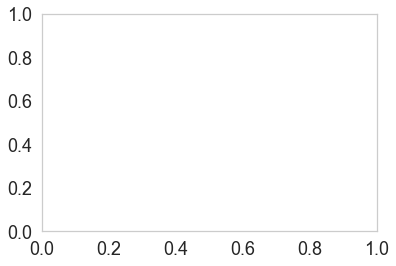

In [18]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(16,0), dpi=80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
# sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
# sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
# sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
# plt.legend()
# plt.show()

Text(0.5, 1.0, 'Density Plot of City Mileage by n_Cylinders')

RuntimeError: libpng signaled error

<Figure size 1280x0 with 1 Axes>

# 3D plots

In [21]:
from mpl_toolkits import mplot3d

## 3D line plot

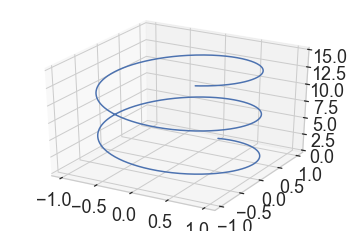

In [23]:
fig = plt.figure()
ax = plt.gca(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline);

## 3D scatter

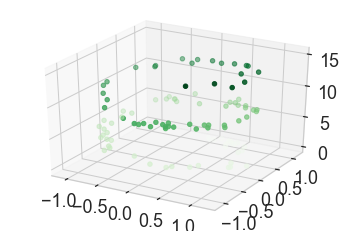

In [24]:
fig = plt.figure()
ax = plt.gca(projection='3d')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');